In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style('dark') # change to darkgrid for grid
plt.style.use('dark_background')

In [2]:
df=pd.read_csv('student.csv')

In [3]:
len(df)

5000

In [4]:
len(df.columns)

10

In [5]:
numerics=['int16','int32','int64','float16','float32','float64']
num_df=df.select_dtypes(include=numerics)
len(num_df.columns)

6

In [6]:
missing=df.isna().sum().sort_values(ascending=False)
missing

Name                 0
Age                  0
Gender               0
Hours_Studied        0
IQ                   0
Physics_Marks        0
Math_Marks           0
Chemistry_Marks      0
Has_Part_Time_Job    0
Study_Hours_Group    0
dtype: int64

### Conclusion
1. No null values

In [7]:
df.columns

Index(['Name', 'Age', 'Gender', 'Hours_Studied', 'IQ', 'Physics_Marks',
       'Math_Marks', 'Chemistry_Marks', 'Has_Part_Time_Job',
       'Study_Hours_Group'],
      dtype='object')

/mnt/stor/miniconda/envs/tf/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


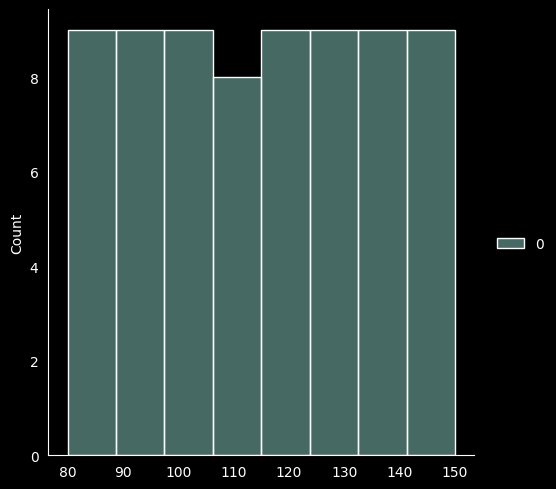

In [8]:
hours_by_iq = df.groupby('IQ')['Hours_Studied']
plot = sns.displot(hours_by_iq)
plot.figure.savefig('charts/hours_by_iq.png')

In [9]:
df.Hours_Studied.describe()

count    5000.000000
mean        5.499279
std         2.588333
min         1.002452
25%         3.258910
50%         5.474256
75%         7.726088
max         9.999925
Name: Hours_Studied, dtype: float64

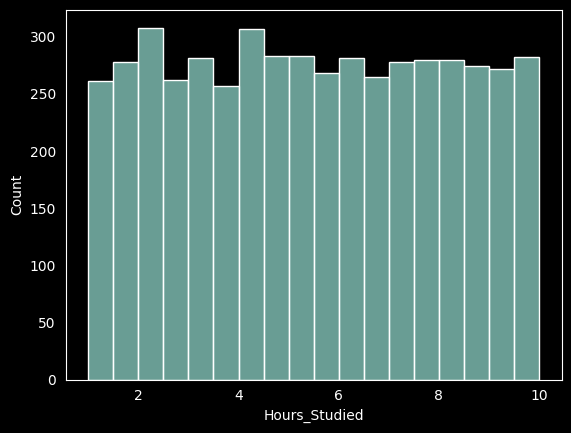

In [10]:
plot=sns.histplot(df.Hours_Studied)
plot.figure.savefig('charts/hours_studied.png')

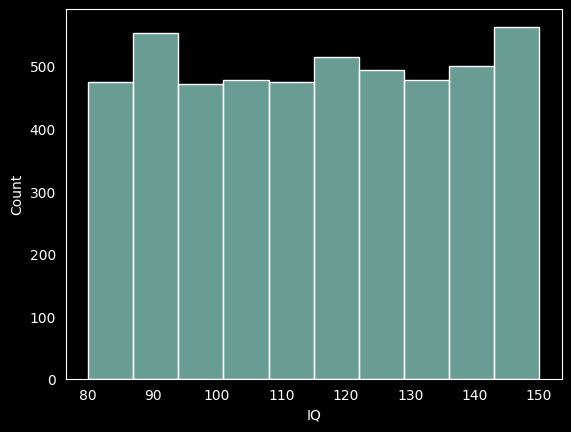

In [11]:
plot=sns.histplot(df.IQ,bins=10)
plot.figure.savefig('charts/iq.png')

In [12]:
df['Age'].describe()

count    5000.000000
mean       31.444800
std         8.148388
min        18.000000
25%        24.000000
50%        32.000000
75%        38.000000
max        45.000000
Name: Age, dtype: float64

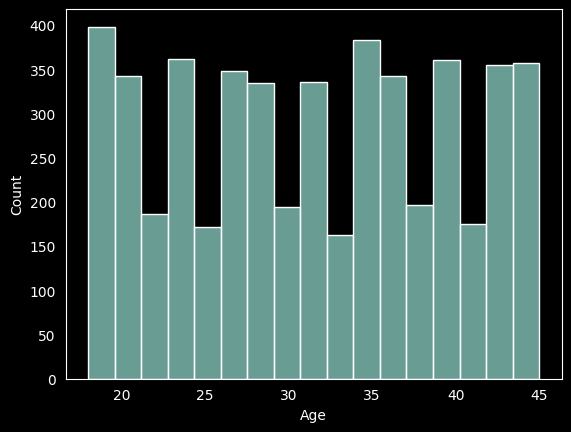

In [13]:
plot=sns.histplot(df.Age)
plot.figure.savefig('charts/age.png')

### Observation
1. The count of IQ is about the same for every bin
2. The ages vary alot
3. Hours studied for all IQs except 110 is the same
### Analysis
1. The IQs distribution is very even
2. The 'class' has no age restrictions
3. 110 IQ may be an outlier

In [14]:
df['marks']=df[['Chemistry_Marks','Math_Marks','Physics_Marks']].mean(axis=1)

In [15]:
df.marks.describe()

count    5000.000000
mean       69.975267
std        10.137999
min        41.666667
25%        63.000000
50%        70.000000
75%        77.333333
max        98.333333
Name: marks, dtype: float64

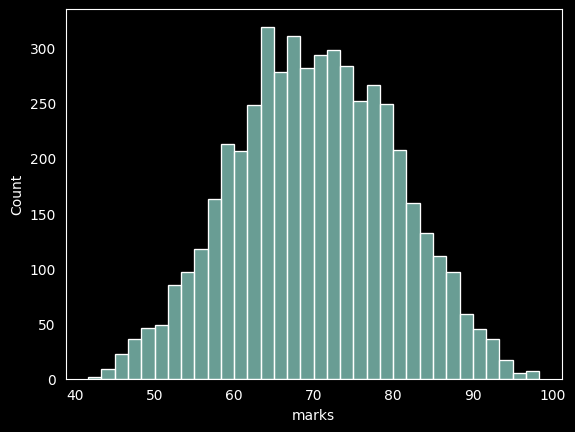

In [16]:
plot=sns.histplot(df.marks)
plot.figure.savefig('charts/marks.png')

### Observation
1. The marks of people peak in the 70s

### Analysis
1. The class average score is somewhere in the low 70s, high 60s

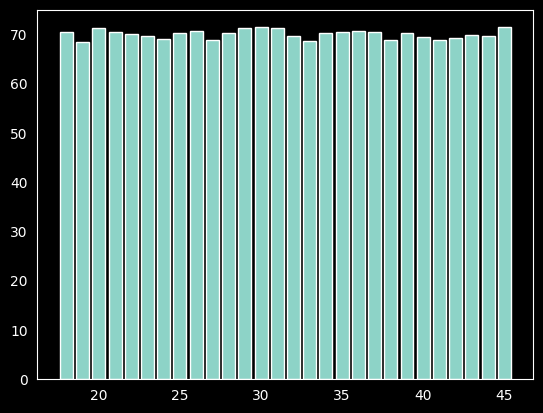

In [17]:
marks_by_age=[np.mean([df.marks[i] for i,age in enumerate(df.Age) if age==age_group]) for age_group in df.Age.unique()]
plt.bar(df.Age.unique(),marks_by_age)
plot.figure.savefig('charts/marks_by_age.png')

In [18]:
df['Has_Part_Time_Job'].value_counts()

Has_Part_Time_Job
True     2525
False    2475
Name: count, dtype: int64

In [19]:
by_part_time=df.groupby('Has_Part_Time_Job')['IQ'].mean()
by_part_time

Has_Part_Time_Job
False    114.792727
True     115.035248
Name: IQ, dtype: float64

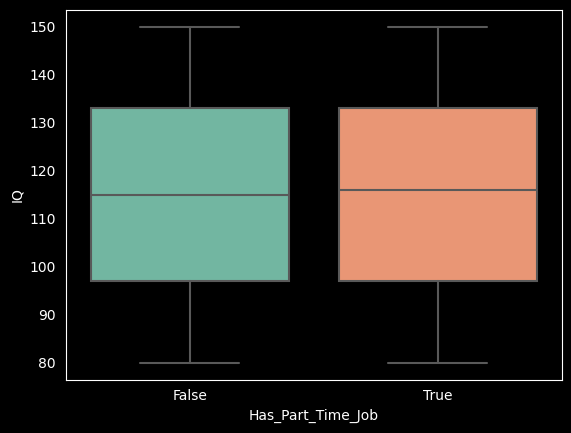

In [20]:
plot=sns.boxplot(y='IQ',x='Has_Part_Time_Job',data=df,palette='Set2')
plot.figure.savefig('charts/box_iq_by_part_time.png')

In [21]:
df.columns

Index(['Name', 'Age', 'Gender', 'Hours_Studied', 'IQ', 'Physics_Marks',
       'Math_Marks', 'Chemistry_Marks', 'Has_Part_Time_Job',
       'Study_Hours_Group', 'marks'],
      dtype='object')

In [22]:
marks_by_part_time=df.groupby('Has_Part_Time_Job')
marks_by_part_time

In [23]:
df['Has_Part_Time_Job'].unique()

array([ True, False])

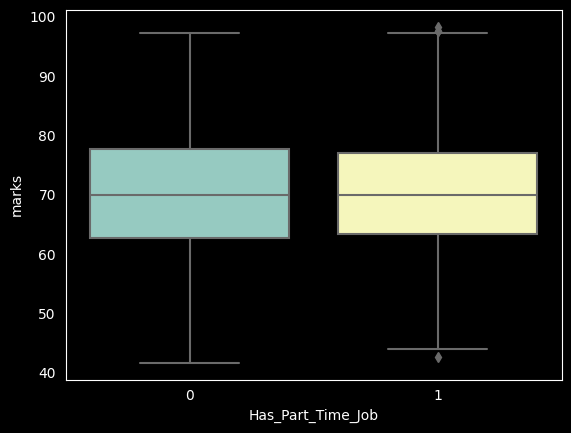

In [24]:
plot=sns.boxplot(x=df['Has_Part_Time_Job'].astype(int),y=df.marks)
plot.figure.savefig('charts/box_marks_by_part_time.png')

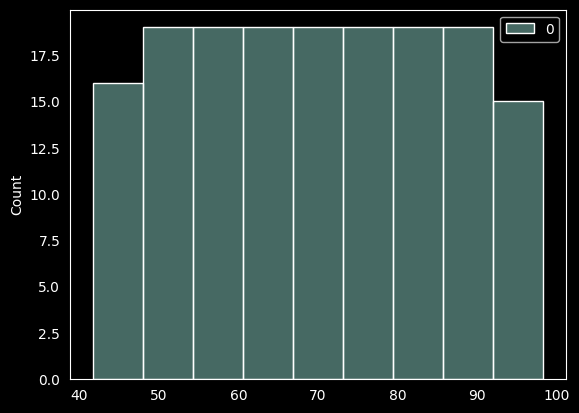

In [25]:
job_vs_marks = df.groupby('marks')['Has_Part_Time_Job']
plot = sns.histplot(job_vs_marks)
plot.figure.savefig('charts/marks_by_part_time.png')


In [26]:
pd.Series(job_vs_marks)[0]

(41.666666666666664,
 680    False
 Name: Has_Part_Time_Job, dtype: bool)

In [27]:
def z_score(data):
    return (data-data.mean())/data.std()

In [28]:
df['z_score']=z_score(df['marks'])

/mnt/stor/miniconda/envs/tf/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


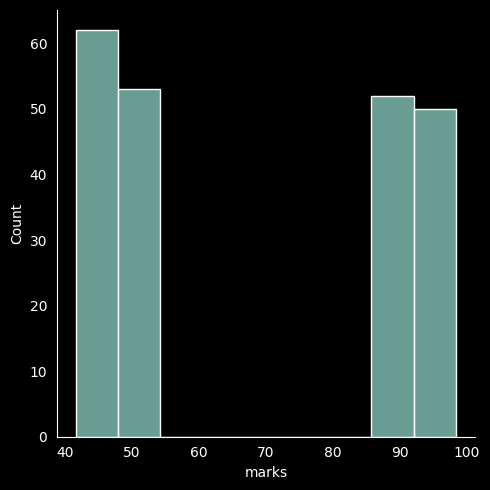

In [29]:
plot=sns.displot(df['marks'][df['z_score'].abs()>2])
plot.figure.savefig('charts/marks-z-score.png')

In [30]:
pd.Series(job_vs_marks).describe()

count                               164
unique                              164
top       (41.666666666666664, [False])
freq                                  1
dtype: object

In [31]:
bins=list(range(0,100,10))
mark_intervals=pd.cut(df['marks'],bins=bins,right=False)
value_counts=mark_intervals.value_counts().sort_index()
value_counts

marks
[0, 10)        0
[10, 20)       0
[20, 30)       0
[30, 40)       0
[40, 50)     115
[50, 60)     725
[60, 70)    1644
[70, 80)    1641
[80, 90)     765
Name: count, dtype: int64

### Observation
1. The IQ of people with and without a job is the same
2. The people with avg marks greater than 90 and less than 50 are less likely to be employed
3. The z-score for marks greater than 86 is high
4. The marks by age intervals are almost the same
### Analysis
1. IQ has no relation with if a person is employed
2. People with less than 50 are less desired due to less than wanted skill level
3. The z-score for marks higher than 90 is high and needs to be explored and may be a problem in the dataset 
4. The marks of a student have almost no correlation with age